In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [156]:

def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out
V_0 = 5
a = 2
def V(x):
        return -V_0/2*(1-np.sign(np.abs(x)-a))
def integrale(F,X):
    sum=0
    for i in range (0,len(F)-1):
        sum+=(X[i+1]-X[i])*F[i]
    return sum

In [168]:
x_m=-10
x_M=10
psi_x_m =0
psi_x_M =0
dx=10**(-2)
eps=dx*10**(-5)
E=-4.770734932405
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
psi_range = np.zeros(int((x_M-x_m)/dx))
psi_range[0] = 0
psi_range[1] = eps




(0.0, 10.0)

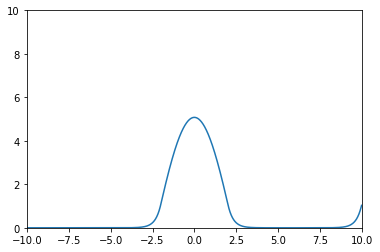

In [173]:

temp = -1
normalisation = 80000
#plt.plot(x_range[0:temp],V(x_range[0:temp]))
out = numerov(psi_range,x_range,V,E,1)
plt.plot(x_range[0:temp],out[0:temp]/normalisation)
plt.xlim(-10,10)
plt.ylim(0,10)

In [181]:
E_min=-5
E_max=0
dE=0.01
E_range=np.linspace(E_min,E_max,int((E_max-E_min)/dE+1))
I=[]
Y_last=[]
for E in E_range:
    x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
    psi_range = np.zeros(int((x_M-x_m)/dx))
    psi_range[0] = 0
    psi_range[1] = eps
    #I.append(integrale(psi_range,x_range))
    out=numerov(psi_range,x_range,V,E,1)
    Y_last.append(out[-1])
    #plt.plot(x_range,out)

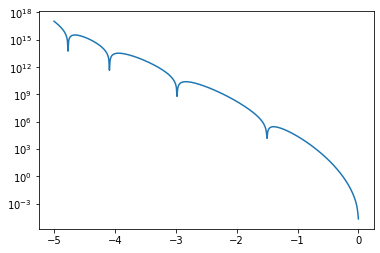

In [179]:
plt.plot(E_range,np.abs(Y_last))
plt.yscale('log')

In [121]:
X=np.linspace(-10,10,1000)
F=np.zeros(1000)

In [122]:
for i in range (0,len(X)):
    F[i]=np.exp(-X[i]**2)

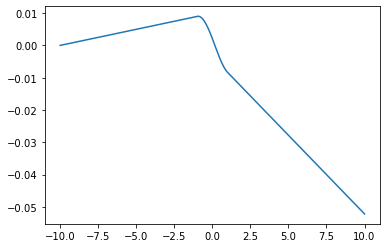

In [146]:
plt.plot(x_range,out)

In [130]:
integrale(F,X)

1.7724538509055145

In [129]:
np.sqrt(np.pi)

1.7724538509055159